<h1>Exploring Financial Data Using Nasdaq Data Link API

- The Nasdaq Data Link API provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the MER/F1 datatable, which contains detailed financial information such as balance sheets, cash flow statements, and income statements.
- We will extract financial data for a specific set of companies, with an emphasis on understanding their financial performance over time. We'll be looking at metrics like Accrued Expenses Turnover and exploring how these values differ among companies and regions.
- Our goal: To perform a detailed analysis of this financial data, including trend analysis and comparative studies, We will utilize Python for data retrieval, cleaning, and analysis, and create visualizations to present our findings effectively.

In [1]:
import config1
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

api_key = config1.API_KEY

In [2]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameter = {'api_key' : api_key,
             'qopts.per_page' : 10}
response = requests.get(api_url,params=parameter)
json_data = response.json()
print(json_data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2023-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

<h3>Processing the JSON Data into a DataFrame

In [3]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameter = {'api_key' : api_key,
             'qopts.per_page' : 10000}

response = requests.get(api_url,params=parameter)
json_data = response.json()

data = json_data['datatable']['data']
column = []
for i in json_data['datatable']['columns']:
    column.append(i['name'])

df_metric = pd.DataFrame(data,columns=column)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2023-12-31,Accrued Expenses Turnover,Derived


<h3>Exploring the Dataset

In [4]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [5]:
necessary_columns = ['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']

In [6]:
df_metric = df_metric[necessary_columns]
filtered_df = df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']
filtered_df.amount.describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

<h3>Enhancing the DataFrame

In [7]:
#Replace country abbreviations with full names.
def full_name(country):
    country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland'

}
    for i in country_mapping:
        if i == country:
            country = country_mapping[i]
            return country

In [14]:
filtered_df.loc[:,'country_name'] = filtered_df['country'].apply(full_name)

In [9]:
#Update the columns name to use snake_case naming convention.
filtered_df.columns = ['report_id','report_date','report_type','amount','company_name','country','region','indicator','statement','country_name']
updated_df = filtered_df.copy()
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
Name: count, dtype: int64

<h3>Understanding financial trends over time

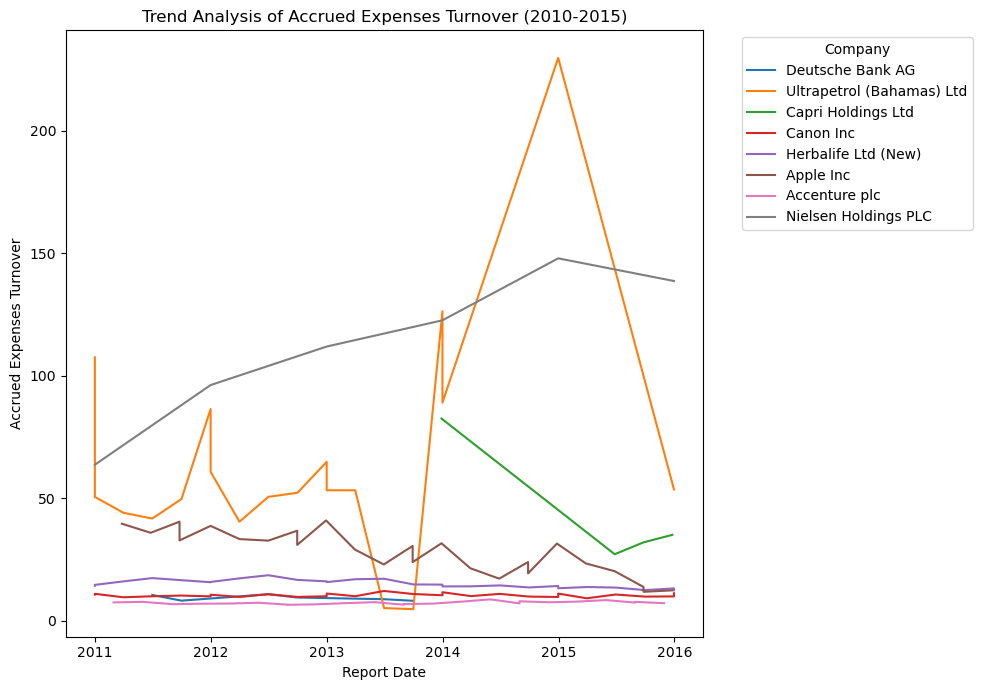

In [10]:
#Filter data from 2010 to 2015
updated_df.report_date = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]
relevant_data = updated_df[['company_name','report_date','amount']]
plt.figure(figsize=(10,7))
for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'],company_data['amount'],label=company)

plt.legend(title='Company',bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.tight_layout()
plt.show()

The graph depicts each company's financial efficiency, with lines tracing how frequently they managed to pay off their accrued expenses over the six-year period. While some companies show dramatic variances, like UltraPetrol (Bahamas) with a significant spike in 2014, others like Apple Inc and Accenture plc display more stable trends.

<h3>Geographical Region Analysis

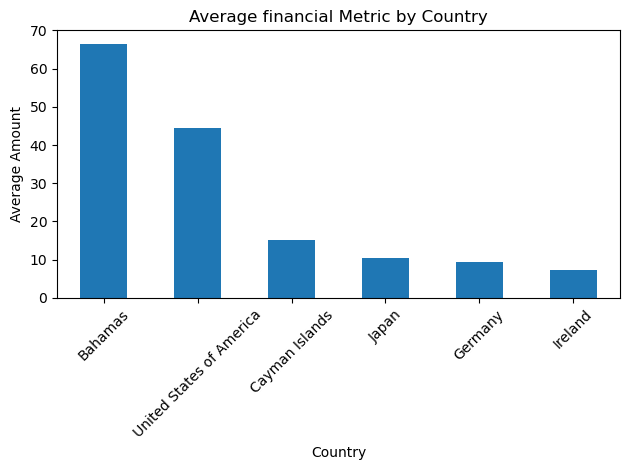

In [11]:
country_avg = updated_df.groupby('country_name')['amount'].mean().sort_values(ascending=False)
plt.figure()
country_avg.plot(kind='bar')
plt.title('Average financial Metric by Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Average Amount')
plt.ylim(top=70)
plt.tight_layout()
plt.show()

It can be seen that companies in the Bahamas and the United States have higher accrued expenses turnover than the rest of the countries, showing that companies in these two countries have effective business strategies.

<h3>Through this project, we've accomplished several key learning objectives:

- We've learned how to make API requests to retrieve financial data from the NASDAQ Data Link API.

- We've become adept at working with authentication, JSON data,-including filtering and extracting specific information needed for our analysis.

- Transformed JSON to DataFrames, a crucial skill we developed is transforming JSON data into Pandas DataFrames, enabling more sophisticated data manipulation.

- We've explored our dataframes in-depth, understanding their structure and content, which is vital for effective data analysis.

- We've performed data cleaning, refining our datasets for accuracy and clarity, and enhancing them for more insightful analysis.

- We've used Matplotlib to visualize financial trends, particularly focusing on Accrued Expenses Turnover to gain deeper insights.